In this project, you will analyze a dataset containing data on various customers' 
annual spending amounts (reported in monetary units) of diverse product categories 
for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the UCI Machine Learning Repository.
For the purposes of this project, the features 'Channel' and 'Region' will be excluded 
in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few 
of the necessary Python libraries required for this project. You will know the dataset 
loaded successfully if the size of the dataset is reported.

In [4]:


# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
# import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv(r'https://raw.githubusercontent.com/jjmanrique/Customer-Segmentation-Project/master/customers.csv')
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")
    

Wholesale customers dataset has 440 samples with 6 features each.


In [5]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best
to select a few sample data points and explore them in more detail. In the code block below, add three indices of
your choice to the indices list which will represent the customers to track. 
It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [6]:

data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [7]:

# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [20, 200, 400]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)


Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,17546,4519,4602,1066,2259,2124
1,3067,13240,23127,3941,9959,731
2,4446,906,1238,3576,153,1014



Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for
your sample customers.

What kind of establishment (customer) could each of the three samples you've chosen represent?
Hint: Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. 
    Avoid using names for establishments, such as saying "McDonalds" when describing a sample customer as a restaurant. 
    You can use the mean values for reference to compare your samples with. The mean values are as follows:

Fresh: 12000.2977
Milk: 5796.2
Grocery: 7951.3
Detergents_paper: 2881.4
Delicatessen: 1524.8
Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments
they might be?

Answer:

The first one seems to be a restaurant. The value for the "Fresh" feature is greater than the mean and
the "detergents_paper" is way above the mean for that feature.

The second one looks like a market due to the great ammount of "grocery" they purchase comparing to the 
mean value of this feature, the bigger amount in "detergents_paper" also gives it away.

The last one is tricky, but seeing the above average value in the "Frozen" feature and a relevant amount
in the "fresh" one, I would say it is a butcher shop.

The samples are realy diferent among each other. The different values in each product's category can help
us guess what kind of establishments they are, primarily looking at the larger values and comparing to the datasets' averages.


Implementation: Feature Relevance
    
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for
understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some 
amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:

Assign new_data a copy of the data by removing a feature of your choice using the DataFrame.drop function.
Use sklearn.cross_validation.train_test_split to split the dataset into training and testing sets.
Use the removed feature as your target label. Set a test_size of 0.25 and set a random_state.
Import a decision tree regressor, set a random_state, and fit the learner to the training data.
Report the prediction score of the testing set using the regressor's score function.

In [10]:
from sklearn.model_selection import cross_val_score
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Detergents_Paper'], axis = 1)
label_data = data.drop(['Grocery', 'Fresh', 'Milk', 'Frozen', 'Delicatessen'], axis = 1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
from sklearn.model_selection import train_test_split
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, label_data, test_size = .25, random_state = 0)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)

In [11]:

print(score)

0.7286551812541454



Question 2


Which feature did you attempt to predict?

What was the reported prediction score?

Is this feature necessary for identifying customers' spending habits?

Hint: The coefficient of determination, R^2, is scored between 0 and 1, with 1 being a perfect fit.
    A negative R^2 implies the model fails to fit the data. If you get a low score for a particular feature, 
    that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an
    important feature to consider when considering relevance.

Answer:

I tried to predict the "Detergents_Paper" feature using the others features.

The score reported was 0.7286.

Since we can predict this feature from the others, it seems that it's not realy relevant for the prediction of customers'
spending habits.

Visualize Feature Distributions


To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present 
in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer,
then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe
that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that
feature and another feature in the data. Run the code block below to produce a scatter matrix.

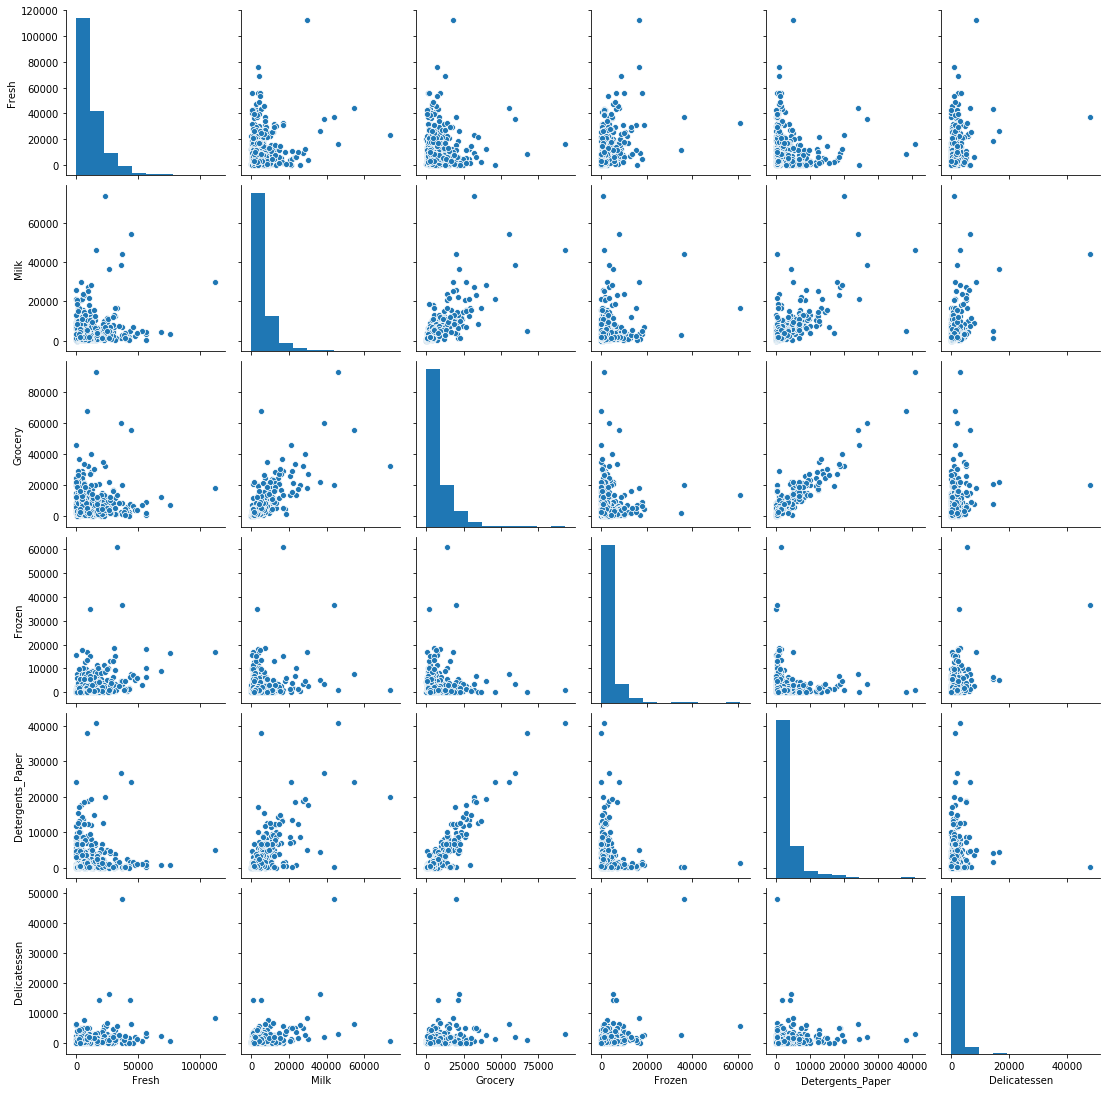

In [17]:
# Produce a scatter matrix for each pair of features in the data
import seaborn as sns
sns.pairplot(data);


Question 3


Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality,
outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
Are there any pairs of features which exhibit some degree of correlation?


Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict?


How is the data for those features distributed?

In [18]:

data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


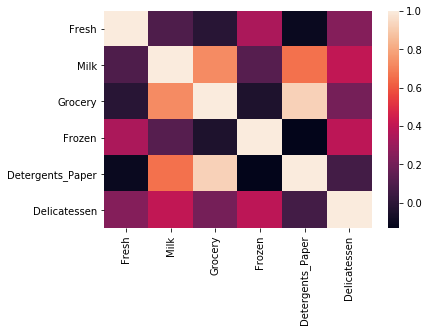

In [19]:
import seaborn as sns
sns.heatmap(data.corr())


Answer:

Most of the data points lie between 0 and 20000 values for the features and does not present itself in normal distribution.
We can see that most of the features have a lot of values next to zero.

The "Detergents_Paper" features shows strong correlation with the "Grocery" feature and some with "Milk" feature.
We can also see certain correlation between "Grocery" and "Milk".

That confirms that "Detergents_Paper" is related to another features, like it can be seen in the prediction exercise.
The data related to those features has most of the values smaller than 20000.

Data Preprocessing


In this section, you will preprocess the data to create a better representation of customers by performing a 
scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical 
step in assuring that results you obtain from your analysis are significant and meaningful.

Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew),
it is most often appropriate to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a Box-Cox test, which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:

Assign a copy of the data to log_data after applying logarithmic scaling. Use the np.log function for this.
Assign a copy of the sample data to log_samples after applying logarithmic scaling. Again, use np.log.

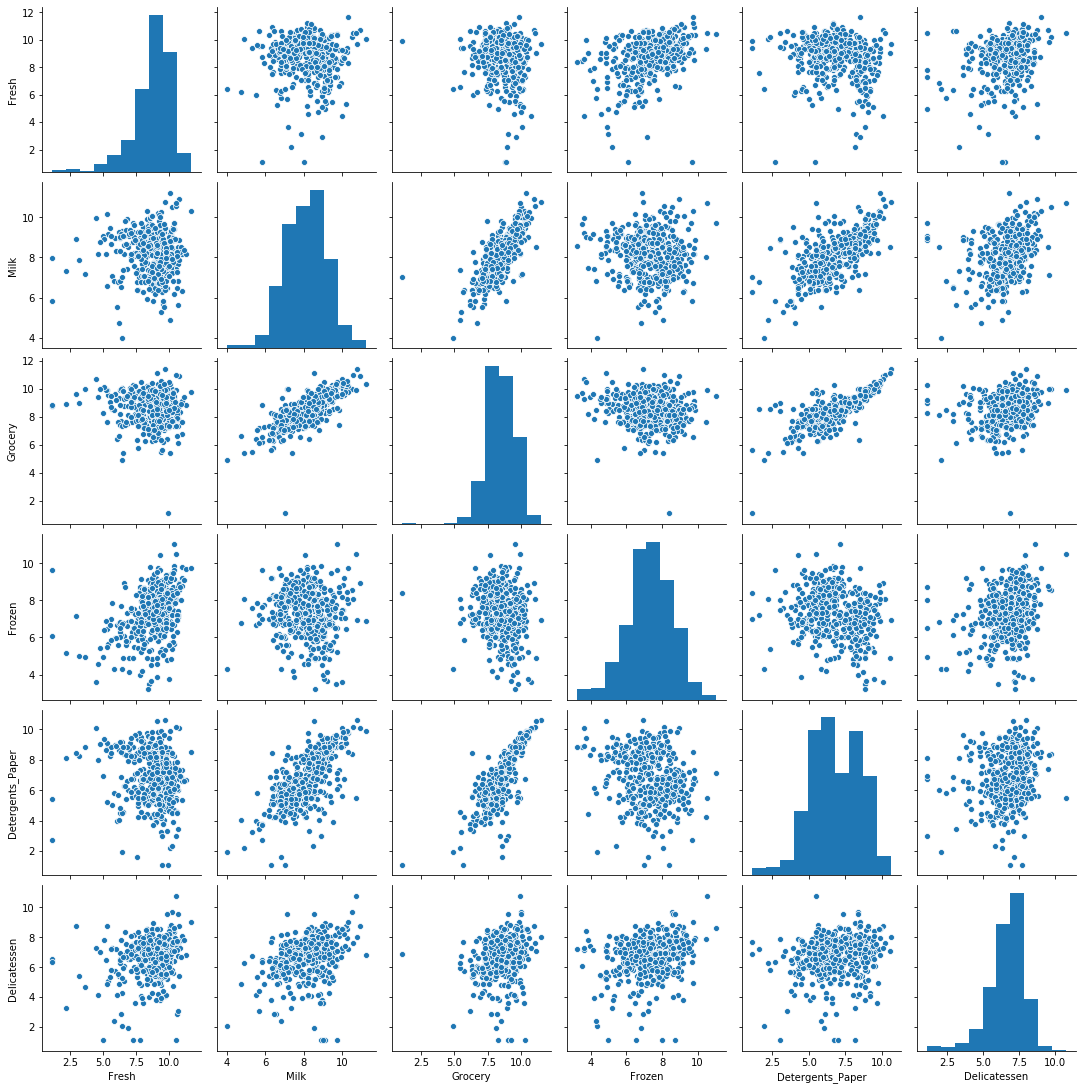

In [20]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
sns.pairplot(log_data);

Observation


After applying a natural logarithm scaling to the data, the . For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [21]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.772581,8.416046,8.434246,6.971669,7.722678,7.661056
1,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
2,8.399760,6.809039,7.121252,8.182000,5.030438,6.921658



Implementation: Outlier Detection
    
    
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis.
The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use Tukey's Method for identfying outliers: An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:

Assign the value of the 25th percentile for the given feature to Q1. Use np.percentile for this.

Assign the value of the 75th percentile for the given feature to Q3. Again, use np.percentile.

Assign the calculation of an outlier step for the given feature to step.

Optionally remove data points from the dataset by adding indices to the outliers list.
NOTE: If you choose to remove any outliers, ensure that the sample data does not contain any of these points!
Once you have performed this implementation, the dataset will be stored in the variable good_data.

In [22]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5* (Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65, 66, 75, 128, 154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372



Question 4

Are there any data points considered outliers for more than one feature based on the definition above?

Should these data points be removed from the dataset?

If any data points were added to the outliers list to be removed, explain why.
Hint: If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant
    removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of 
    whether or not to remove them.

Answer:

Yes, the point nº 75 is an outlier for both "Detergents_Paper" and "Grocery" features and nº 154 for "Delicatessem",
"Grocery" and "Milk" features. There is also nº 128 for "Fresh" and "Delicatessen", 65 for "Fresh" and "Frozen" and 66 for "Fresh" and "Delicatessen".

I guess this points should be excluded because they may skew our results.

All of the data points included on the Outliers list had anomalous values in more than a feature.


Feature Transformation


In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the 
wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

Implementation: PCA
    
Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed,
we can now apply PCA to the good_data to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the explained variance ratio of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:

Import sklearn.decomposition.PCA and assign the results of fitting PCA in six dimensions with good_data to pca.
Apply a PCA transformation of log_samples using pca.transform, and assign the results to pca_samples.

In [24]:

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

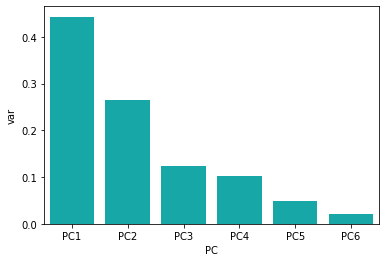

In [30]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5','PC6']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");


Question 5

How much variance in the data is explained in total by the first and second principal component?

How much variance in the data is explained by the first four principal components?

Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, 

stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.
Hint: A positive increase in a specific dimension corresponds with an increase of the positive-weighted features and 
    a decrease of the negative-weighted features. The rate of increase or decrease is based on the individual feature weights.

Answer:

70.68% of the variance is explained by the first two dimensions.

93.11% of the variance is in the four principal components.

In the first component we have great representation to the "Detergents_Paper" feature and only good for "Milk" and 
"Grocery" features. This component has 0.4430 of the total variance represented. The other features are not well represented.

In the second component, we can see the best representation for the "Fresh" feature along nice representations for "Frozen"
and "Grocery" features. This component has 0.2638 of the total variance.
The third one has great representation for "Fresh" and "Delicatessen" categories, regular for "Frozen" and "Detergents_paper" 
and poor for the other. It has 0.1231 of the total variance.
The last one has the best representation for the "Frozen" category and a nice for the "Delicatessen" feature. "Detergents_paper" and "Fresh" are represented regularly and the other two are represented poorly.

Implementation: Dimensionality Reduction
    
    
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect,
reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies
less of the total variance in the data is being explained. Because of this, the cumulative explained variance ratio is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:

Assign the results of fitting PCA in two dimensions with good_data to pca.
Apply a PCA transformation of good_data using pca.transform, and assign the results to reduced_data.
Apply a PCA transformation of log_samples using pca.transform, and assign the results to pca_samples.

In [32]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [33]:

# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.8375,-1.0765
1,-2.9903,-0.3645
2,2.5025,0.1006


In [34]:
# https://matthew-brett.github.io/teaching/pca_introduction.html


Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering 
algorithm to identify the various customer segments hidden in the data. You will then recover specific data points 
from the clusters to understand their significance by transforming them back into their original dimension and scale.

Question 6

What are the advantages to using a K-Means clustering algorithm?

What are the advantages to using a Gaussian Mixture Model clustering algorithm?

Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

Hint: Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

Answer:

K-means begins creating random centroids and them minimizing the distances to the points nearby. On each iteration we 
are certain that a point belongs to a X cluster, so it uses "hard clustering". Some benefits are the smaller running time, and the hability to handle high dimensional data. It's also easy to interpret and implement.
Gaussian Mixture Model uses probability of a sample to determine the feasibility of it belonging to a cluster. 
This is called "soft clustering". The benefits are the hability to handle different shapes of clusters, working well with non-linear geometric distributions and does not bias the cluster sizes like k-means.
As we are looking to have an algorithim of easy implementation and visualization and the data does not seem too
geometrically complex, I will stay with K-means.

Implementation: Creating Clusters
    
    
Depending on the problem, the number of clusters that you expect to be in the data may already be known.
When the number of clusters is not known a priori, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's silhouette coefficient. The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the mean silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:

Fit a clustering algorithm to the reduced_data and assign it to clusterer.
Predict the cluster for each data point in reduced_data using clusterer.predict and assign them to preds.
Find the cluster centers using the algorithm's respective attribute and assign them to centers.
Predict the cluster for each sample data point in pca_samples and assign them sample_preds.
Import sklearn.metrics.silhouette_score and calculate the silhouette score of reduced_data against preds.
Assign the silhouette score to score and print the result.

In [36]:
# TODO: Apply your clustering algorithm of choice to the reduced data
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=2, random_state=0).fit(reduced_data)



# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
from sklearn.metrics import silhouette_score
score = silhouette_score(reduced_data, preds)
print(score)

0.42628101546910835


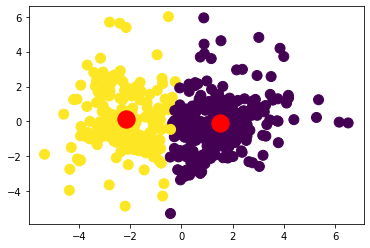

In [69]:
plt.scatter(reduced_data['Dimension 1'],reduced_data['Dimension 2'], s=100, c=preds, label ='Cluster 1')

plt.scatter(clusterer.cluster_centers_[:, 0], clusterer.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')

In [37]:

# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


In [38]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0



Question 8


Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?
Hint: A customer who is assigned to 'Cluster X' should best identify with the establishments represented by the feature set of 'Segment X'. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

Answer:

The first segment might represent stablishments that prepare food, like restaurants, fast-foods or coffe shops;
The second one could be grocery stores, markets. These places purchase great quantities of products from "Grocery" and "Detergents_Paper" categories.


Question 9


For each sample point, which customer segment from Question 8 best represents it?
Are the predictions for each sample point consistent with this?*


Answer:

The two first sample points are represent by Segment 2 and the last one is represented by Segment 1.
Yes, because the points with "Grocery" and "Detergents_Paper" values above the dataset average are assigned to Segment 2 and the other that has smaller values for this features compared to the average and a amount greater than the average in the "Frozen" one is assigned to Segment 1.


Question 10


Companies will often run A/B tests when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively.

How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*
Hint: Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

Answer:

We can use an A/B test treating the customers of each cluster in a different way because we can't assume that both of the segments will react in the same manner. So, in one segment, say it's Segment 1, we can test the delivery service 5 days a week due to the need of "Fresh" supplies. Thus, in the other segment we proceed to the delivery 3 days a week. Testing that we can see if the hypothesis is true and prove how different this customers are.


Question 11


Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a customer segment it best identifies with (depending on the clustering algorithm applied), we can consider 'customer segment' as an engineered feature for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a customer segment to determine the most appropriate delivery service.

How can the wholesale distributor label the new customers using only their estimated product spending and the customer segment data?
Hint: A supervised learner could be used to train on the original customers. What would be the target variable?

Answer:

We can use supervised learner using the customer segment as the label of each data point. So, it will become a binary classification problem. After training the model, we can predict the output for the new customers (0 or 1).